In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',1000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading our Train and Test Dataset
df_train = pd.read_csv("D:/Credit Card Fraud Detection/fraudTrain.csv")
df_test = pd.read_csv("D:/Credit Card Fraud Detection/fraudTest.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Exploratory Data Analysis

In [3]:
print(df_train.shape)
print(df_test.shape)

(1048575, 23)
(555719, 23)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
#Dropping Unnamed Column
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
#Converting Date column to Datatime Format
df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048575 non-null  datetime64[ns]
 1   cc_num                 1048575 non-null  float64       
 2   merchant               1048575 non-null  object        
 3   category               1048575 non-null  object        
 4   amt                    1048575 non-null  float64       
 5   first                  1048575 non-null  object        
 6   last                   1048575 non-null  object        
 7   gender                 1048575 non-null  object        
 8   street                 1048575 non-null  object        
 9   city                   1048575 non-null  object        
 10  state                  1048575 non-null  object        
 11  zip                    1048575 non-null  int64         
 12  lat                    10485

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [10]:
#Dropping fields not necessary for model building
drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']

df_train1 = df_train.drop(drop_cols,axis=1)
df_test1 = df_test.drop(drop_cols,axis=1)

df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048575 non-null  datetime64[ns]
 1   category               1048575 non-null  object        
 2   amt                    1048575 non-null  float64       
 3   gender                 1048575 non-null  object        
 4   city                   1048575 non-null  object        
 5   state                  1048575 non-null  object        
 6   lat                    1048575 non-null  float64       
 7   long                   1048575 non-null  float64       
 8   city_pop               1048575 non-null  int64         
 9   job                    1048575 non-null  object        
 10  dob                    1048575 non-null  datetime64[ns]
 11  merch_lat              1048575 non-null  float64       
 12  merch_long             10485

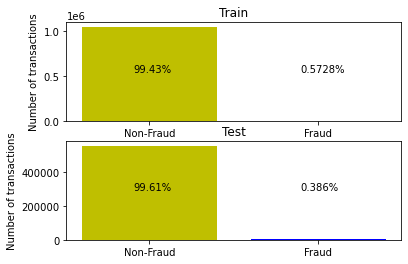

In [11]:
#Checking class imbalance
classes_train=df_train1['is_fraud'].value_counts()
normal_share_train=classes_train[0]/df_train1['is_fraud'].count()*100
fraud_share_train=classes_train[1]/df_train1['is_fraud'].count()*100

classes_test=df_test1['is_fraud'].value_counts()
normal_share_test=classes_test[0]/df_test1['is_fraud'].count()*100
fraud_share_test=classes_test[1]/df_test1['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['y','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [12]:
#Creating field for age on transaction date
df_train1['age_at_trans'] = df_train1['trans_date'] - df_train1['dob']
df_train1['age_at_trans'] = df_train1['age_at_trans'].astype('timedelta64[Y]')

df_test1['age_at_trans'] = df_test1['trans_date'] - df_test1['dob']
df_test1['age_at_trans'] = df_test1['age_at_trans'].astype('timedelta64[Y]')

df_train1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:00,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:00,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:00,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:00,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:00,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [13]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048575 non-null  datetime64[ns]
 1   category               1048575 non-null  object        
 2   amt                    1048575 non-null  float64       
 3   gender                 1048575 non-null  object        
 4   city                   1048575 non-null  object        
 5   state                  1048575 non-null  object        
 6   lat                    1048575 non-null  float64       
 7   long                   1048575 non-null  float64       
 8   city_pop               1048575 non-null  int64         
 9   job                    1048575 non-null  object        
 10  dob                    1048575 non-null  datetime64[ns]
 11  merch_lat              1048575 non-null  float64       
 12  merch_long             10485

In [14]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [15]:
fraud_city = pd.DataFrame(df_train1.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder', 'Aledo',
       'Allenhurst', 'Allentown', 'Alpharetta', 'Altair',
       ...
       'Williamsburg', 'Wilmette', 'Wilmington', 'Winfield', 'Winnsboro',
       'Winslow', 'Winter', 'Winthrop', 'Wittenberg',
       'Yellowstone National Park'],
      dtype='object', name='city', length=568)

In [16]:
fraud_state = pd.DataFrame(df_train1.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [17]:
fraud_job = pd.DataFrame(df_train1.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education', 'Administrator, local government',
       ...
       'Travel agency manager', 'Tree surgeon', 'Veterinary surgeon',
       'Video editor', 'Volunteer coordinator', 'Warden/ranger',
       'Waste management officer', 'Water quality scientist', 'Web designer',
       'Wellsite geologist'],
      dtype='object', name='job', length=396)

In [18]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude
df_train1['lat_dist'] = abs(round(df_train1['merch_lat']-df_train1['lat'],3))
df_train1['long_dist'] = abs(round(df_train1['merch_long']-df_train1['long'],3))

df_test1['lat_dist'] = abs(round(df_test1['merch_lat']-df_test1['lat'],3))
df_test1['long_dist'] = abs(round(df_test1['merch_long']-df_test1['long'],3))

df_train1[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [19]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048575 non-null  datetime64[ns]
 1   category               1048575 non-null  object        
 2   amt                    1048575 non-null  float64       
 3   gender                 1048575 non-null  object        
 4   city                   1048575 non-null  object        
 5   state                  1048575 non-null  object        
 6   lat                    1048575 non-null  float64       
 7   long                   1048575 non-null  float64       
 8   city_pop               1048575 non-null  int64         
 9   job                    1048575 non-null  object        
 10  dob                    1048575 non-null  datetime64[ns]
 11  merch_lat              1048575 non-null  float64       
 12  merch_long             10485

In [20]:
#Creating month column
df_train1['trans_month'] = pd.DatetimeIndex(df_train1['trans_date']).month
df_test1['trans_month'] = pd.DatetimeIndex(df_test1['trans_date']).month

df_train1[['trans_date_trans_time','trans_month']].head()

,trans_date_trans_time,trans_month
0,2019-01-01 00:00:00,1
1,2019-01-01 00:00:00,1
2,2019-01-01 00:00:00,1
3,2019-01-01 00:01:00,1
4,2019-01-01 00:03:00,1


In [21]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048575 non-null  datetime64[ns]
 1   category               1048575 non-null  object        
 2   amt                    1048575 non-null  float64       
 3   gender                 1048575 non-null  object        
 4   city                   1048575 non-null  object        
 5   state                  1048575 non-null  object        
 6   lat                    1048575 non-null  float64       
 7   long                   1048575 non-null  float64       
 8   city_pop               1048575 non-null  int64         
 9   job                    1048575 non-null  object        
 10  dob                    1048575 non-null  datetime64[ns]
 11  merch_lat              1048575 non-null  float64       
 12  merch_long             10485

In [22]:
df_train1.nunique()

trans_date_trans_time     476595
category                      14
amt                        48602
gender                         2
city                         879
state                         51
lat                          950
long                         951
city_pop                     865
job                          493
dob                          950
merch_lat                1016437
merch_long               1034825
is_fraud                       2
trans_date                   434
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [23]:
df_test1.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
lat_dist                   1001
long_dist                  1001
trans_month                   7
dtype: int64

# Checking if there are any highly skewed categorical variables

In [24]:
round(df_train1['category'].value_counts()/len(df_train1.index)*100,2)

gas_transport     10.15
grocery_pos        9.53
home               9.50
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.06
personal_care      7.01
health_fitness     6.61
misc_pos           6.15
misc_net           4.87
grocery_net        3.50
travel             3.13
Name: category, dtype: float64

In [25]:
round(df_train1['gender'].value_counts()/len(df_train1.index)*100,2)

F    54.74
M    45.26
Name: gender, dtype: float64

In [26]:
round(df_train1['city'].value_counts()/len(df_train1.index)*100,2)

Birmingham                   0.43
San Antonio                  0.40
Meridian                     0.40
Phoenix                      0.39
Utica                        0.39
Thomas                       0.36
Conway                       0.36
Cleveland                    0.35
Warren                       0.35
Houston                      0.32
Burbank                      0.32
Naples                       0.32
Arcadia                      0.32
Indianapolis                 0.32
Brandon                      0.31
Fulton                       0.30
Allentown                    0.28
Lakeland                     0.28
Andrews                      0.28
Dallas                       0.28
Washington                   0.28
Detroit                      0.28
Orient                       0.28
Lahoma                       0.28
Philadelphia                 0.28
Hudson                       0.27
Huntsville                   0.27
Fort Washakie                0.27
Bradley                      0.24
Bowdoin       

In [27]:
round(df_train1['job'].value_counts()/len(df_train1.index)*100,2)

Film/video editor                                              0.76
Exhibition designer                                            0.71
Surveyor, land/geomatics                                       0.67
Naval architect                                                0.67
Materials engineer                                             0.64
Designer, ceramics/pottery                                     0.64
Systems developer                                              0.60
IT trainer                                                     0.59
Financial adviser                                              0.59
Environmental consultant                                       0.59
Chartered public finance accountant                            0.56
Copywriter, advertising                                        0.55
Chief Executive Officer                                        0.55
Scientist, audiological                                        0.55
Comptroller                                     

In [28]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048575 non-null  datetime64[ns]
 1   category               1048575 non-null  object        
 2   amt                    1048575 non-null  float64       
 3   gender                 1048575 non-null  object        
 4   city                   1048575 non-null  object        
 5   state                  1048575 non-null  object        
 6   lat                    1048575 non-null  float64       
 7   long                   1048575 non-null  float64       
 8   city_pop               1048575 non-null  int64         
 9   job                    1048575 non-null  object        
 10  dob                    1048575 non-null  datetime64[ns]
 11  merch_lat              1048575 non-null  float64       
 12  merch_long             10485

In [29]:
df_train1.nunique()

trans_date_trans_time     476595
category                      14
amt                        48602
gender                         2
city                         879
state                         51
lat                          950
long                         951
city_pop                     865
job                          493
dob                          950
merch_lat                1016437
merch_long               1034825
is_fraud                       2
trans_date                   434
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [30]:
#Dropping variables not useful for model building
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date']

df_train2 = df_train1.drop(drop_cols,axis=1)
df_test2 = df_test1.drop(drop_cols,axis=1)

df_train2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.0,0.254,0.830,1


In [31]:
#Binary mapping on the basis of gender
df_train2['gender'] = df_train2['gender'].map({'M': 1, 'F': 0})
df_test2['gender'] = df_test2['gender'].map({'M': 1, 'F': 0})

df_train2.head()
     

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,0,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,32.0,0.254,0.830,1


In [32]:
df_train2[['amt','city_pop','age_at_trans','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])
     

,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.027910e+01,8.905776e+04,4.538711e+01,5.001946e-01,5.001665e-01
std,1.599518e+02,3.024351e+05,1.738128e+01,2.885006e-01,2.889210e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.640000e+00,7.430000e+02,3.200000e+01,2.510000e-01,2.500000e-01
50%,4.745000e+01,2.456000e+03,4.300000e+01,5.000000e-01,5.000000e-01
75%,8.305000e+01,2.032800e+04,5.600000e+01,7.500000e-01,7.500000e-01
90%,1.366100e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.962600e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.448852e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [33]:
# Creating dummy variables for Category
df_train3 = pd.get_dummies(df_train2,columns=['category'],drop_first=True)
df_test3 = pd.get_dummies(df_test2,columns=['category'],drop_first=True)

df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1048575 non-null  float64
 1   gender                   1048575 non-null  int64  
 2   state                    1048575 non-null  object 
 3   city_pop                 1048575 non-null  int64  
 4   is_fraud                 1048575 non-null  int64  
 5   age_at_trans             1048575 non-null  float64
 6   lat_dist                 1048575 non-null  float64
 7   long_dist                1048575 non-null  float64
 8   trans_month              1048575 non-null  int64  
 9   category_food_dining     1048575 non-null  uint8  
 10  category_gas_transport   1048575 non-null  uint8  
 11  category_grocery_net     1048575 non-null  uint8  
 12  category_grocery_pos     1048575 non-null  uint8  
 13  category_health_fitness  1048575 non-null 

# Building Model

In [34]:
#Dropping State
df_train4 = df_train3.drop('state',axis=1)
df_test4 = df_test3.drop('state',axis=1)
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1048575 non-null  float64
 1   gender                   1048575 non-null  int64  
 2   city_pop                 1048575 non-null  int64  
 3   is_fraud                 1048575 non-null  int64  
 4   age_at_trans             1048575 non-null  float64
 5   lat_dist                 1048575 non-null  float64
 6   long_dist                1048575 non-null  float64
 7   trans_month              1048575 non-null  int64  
 8   category_food_dining     1048575 non-null  uint8  
 9   category_gas_transport   1048575 non-null  uint8  
 10  category_grocery_net     1048575 non-null  uint8  
 11  category_grocery_pos     1048575 non-null  uint8  
 12  category_health_fitness  1048575 non-null  uint8  
 13  category_home            1048575 non-null 

In [35]:
#Splitting Train and Test Dataset
X_train = df_train4.drop(['is_fraud'],axis=1)
y_train = df_train4['is_fraud']

X_test = df_test4.drop(['is_fraud'],axis=1)
y_test = df_test4['is_fraud']

# Oversampling data to compensate for the high class imbalance in the data

In [36]:
from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1042569), (1, 1043264)]


# Building a Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [41]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)
     

In [42]:
rf.fit(X_train_res, y_train_res)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [43]:
rf.oob_score_

0.8820821225860364

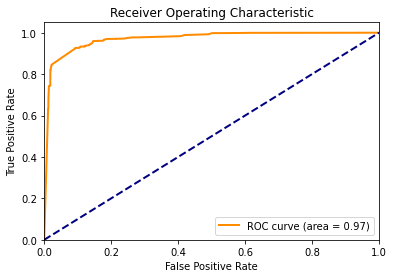

In [45]:
from sklearn.metrics import auc
y_probs = rf.predict_proba(X_train)[:, 1]  # Probability of positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_train, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [47]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.879199
13,category_kids_pets,0.018714
12,category_home,0.018590
18,category_shopping_pos,0.018042
8,category_gas_transport,0.016109
19,category_travel,0.012150
10,category_grocery_pos,0.009957
15,category_misc_pos,0.009795
17,category_shopping_net,0.007522
7,category_food_dining,0.003339


In [48]:
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89   1042569
           1       0.89      0.89      0.89   1043264

    accuracy                           0.89   2085833
   macro avg       0.89      0.89      0.89   2085833
weighted avg       0.89      0.89      0.89   2085833



# Predict on Test Set

In [50]:
y_test_pred = rf.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.93      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.91      0.50    555719
weighted avg       1.00      0.89      0.94    555719



# Testing Model on Original Data without oversampling

In [53]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1042569
           1       0.05      0.93      0.09      6006

    accuracy                           0.89   1048575
   macro avg       0.52      0.91      0.52   1048575
weighted avg       0.99      0.89      0.94   1048575

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.93      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.91      0.50    555719
weighted avg       1.00      0.89      0.94    555719



In [54]:
df_train.nunique()

trans_date_trans_time     476595
cc_num                       943
merchant                     693
category                      14
amt                        48602
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
lat                          950
long                         951
city_pop                     865
job                          493
dob                          950
trans_num                1048575
unix_time                1030650
merch_lat                1016437
merch_long               1034825
is_fraud                       2
trans_date                   434
dtype: int64

In [55]:
df_train.shape

(1048575, 23)

In [56]:
df_train_merge = df_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:00,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:00,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:00,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:00,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:00,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [57]:
df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [58]:
df_train_final = pd.concat([df_train_merge, df_train_pred],axis=1)
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:00,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:00,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:00,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:00,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:00,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [59]:
df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:00,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:00,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:00,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:00,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:00,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [60]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1042569
1       6006
Name: is_fraud, dtype: int64

In [61]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    930531
1    118044
Name: is_fraud_pred, dtype: int64

In [62]:
df_test_merge = df_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [63]:
df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [64]:
df_test_final = pd.concat([df_test_merge, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [65]:
df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [66]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [67]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    494188
1     61531
Name: is_fraud_pred, dtype: int64

In [68]:
df_merge_final = pd.concat([df_train_final, df_test_final],axis=0)
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:00,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:00,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:00,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:00,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:00,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [69]:
df_merge_final.shape

(1604294, 5)

# Cost Benefit Analysis

In [70]:
df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:00,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:00,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:00,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:00,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:00,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [71]:
g = df_merge_final.groupby(["year","month"])

In [72]:
g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         23732
      6         30058
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [73]:
df_merge_final.trans_num.count()/24

66845.58333333333

In [74]:
df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24

339.625

In [75]:
df_merge_final[df_merge_final['is_fraud']==1].amt.mean()

529.99007115691

In [76]:
df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24

7482.291666666667

In [77]:
Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

23.666666666666668